In [15]:
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split

In [16]:
# data = pd.read_csv('TEST Dataset.csv')
data = pd.read_csv('IMDB Dataset.csv')

reviews = data['review']
sentiments = data['sentiment']

print('Number of Reviews: ', len(reviews))
print('% Positive: ', (len(reviews[sentiments == 'positive'])/len(reviews))*100)
print('% Positive: ', (len(reviews[sentiments == 'negative'])/len(reviews))*100)

#Removing Punctuation
reviews = reviews.str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))

# Creating Bag Of Words
vectorizer = CountVectorizer(stop_words='english') #Removes some words like 'the' 'and' 'a' 
x = vectorizer.fit_transform(reviews)

#Predictive Model Split
x_train, x_test, y_train, y_test = train_test_split(x, sentiments, test_size=0.2, random_state=1)

Number of Reviews:  50000
% Positive:  50.0
% Positive:  50.0


In [17]:
from sklearn import tree

def DT(x_train, x_test, y_train, y_test, hyper):
    scoresAvg = []

    for param in hyper:
        clf = tree.DecisionTreeClassifier(max_depth=param, random_state=1)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())

    best = hyper[scoresAvg.index(max(scoresAvg))]

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Decision Tree: Accuracy vs. Max Depth')
    plt.xlabel('Max Depth')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best Decision Tree Depth: ', best)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(x_train, x_test, y_train, y_test, hyper):
    scoresAvg = []

    for param in hyper:
        clf = KNeighborsClassifier(n_neighbors=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())

    best = hyper[scoresAvg.index(max(scoresAvg))]

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('K-Nearest Neighbor: Accuracy vs. K Value')
    plt.xlabel('K Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best K Value: ', best)

In [24]:
from sklearn.linear_model import LogisticRegression

def LR(x_train, x_test, y_train, y_test, hyper):
    scoresAvg = []

    for param in hyper:
        clf = LogisticRegression(C=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())

    best = hyper[scoresAvg.index(max(scoresAvg))]

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Logistic Regression : Accuracy vs. K Value')
    plt.xlabel('C Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best K Value: ', best)

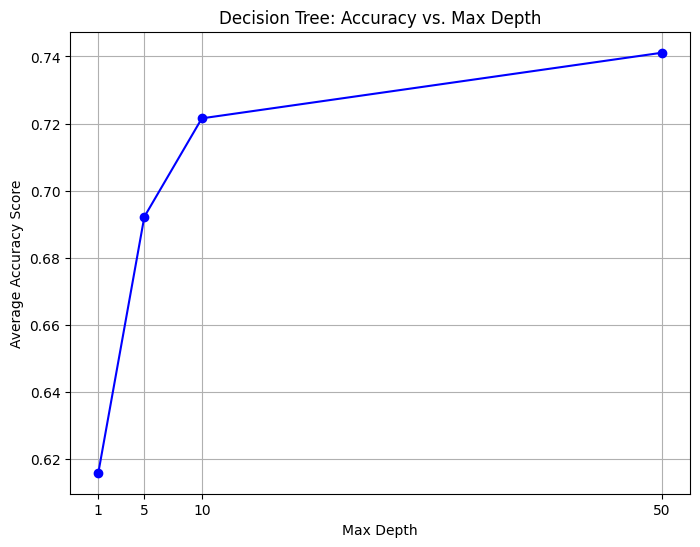

Best Decision Tree Depth:  50


In [20]:
DT_DEPTHS = [1, 5, 10, 50]
DT(x_train, x_test, y_train, y_test, DT_DEPTHS)

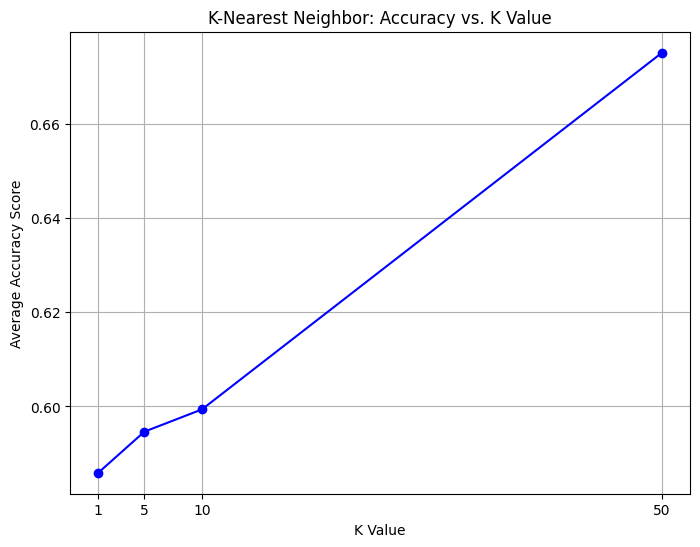

Best K Value:  50


In [21]:
kVals = [1, 5, 10, 50]
KNN(x_train, x_test, y_train, y_test, kVals)

c:\Users\A02329350\env\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\A02329350\env\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

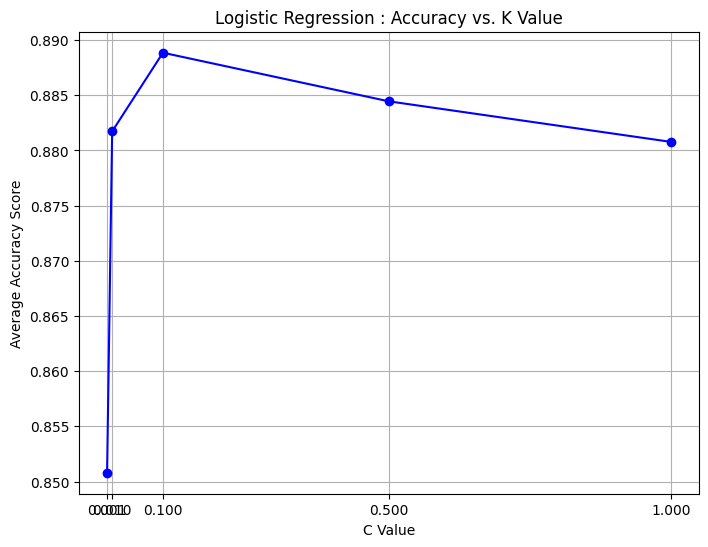

Best K Value:  0.1


In [25]:
cVals = [0.001, 0.01, 0.1, 0.5, 1]
LR(x_train, x_test, y_train, y_test, cVals)